In [1]:
from risk_budgeting import *
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
mu  = np.array([0.02, 0.06, 0.10])
cov = np.array([[0.0064, 0.0080, 0.0048],
                [0.0080, 0.0400, 0.0240],
                [0.0048, 0.0240, 0.0900]])

X = multivariate_normal.rvs(mu, cov, 100000)

In [3]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='volatility', budgets='ERC')

# Then we solve the defined problem using X
rb.solve(X)

In [4]:
# risk bugdeting portfolio
rb.x

array([0.60916675, 0.2215423 , 0.16929095])

In [203]:
print(RiskBudgeting.__doc__)



    Representation of a Risk Budgeting problem.
    This class allows to find the Risk Budgeting portfolio under certain specifications.

    Parameters
    ----------

    risk_measure : {'volatility' (default),
                    'median_absolute_deviation',
                    'expected_shortfall',
                    'power_spectral_risk_measure',
                    'variantile'}
        String describing the type of risk measure to use.

    budgets : {'ERC' (default), numpy.ndarray}
        String or array describing the risk budgets. 'ERC' stands for Equal Risk Contribution. In other cases, risk budgets
        should be given as an array with relevant dimension.

    expectation : bool, default to False.

    beta : float, defaults to 1.00
        Weight of the risk measure component when 'expectation' is True. Not used when 'expectation' is False.

    delta : float, defaults to 1.00
        Weight of the expected return component when 'expectation' is True. Not used when 

In [205]:
help(RiskBudgeting)

Help on class RiskBudgeting in module risk_budgeting:

class RiskBudgeting(builtins.object)
 |  RiskBudgeting(risk_measure='volatility', budgets='ERC', expectation=False, beta=1.0, delta=1.0, alpha=None, gamma=None)
 |  
 |  Representation of a Risk Budgeting problem.
 |  This class allows to find the Risk Budgeting portfolio under certain specifications.
 |  
 |  Parameters
 |  ----------
 |  
 |  risk_measure : {'volatility' (default),
 |                  'median_absolute_deviation',
 |                  'expected_shortfall',
 |                  'power_spectral_risk_measure',
 |                  'variantile'}
 |      String describing the type of risk measure to use.
 |  
 |  budgets : {'ERC' (default), numpy.ndarray}
 |      String or array describing the risk budgets. 'ERC' stands for Equal Risk Contribution. In other cases, risk budgets
 |      should be given as an array with relevant dimension.
 |  
 |  expectation : bool, default to False.
 |  
 |  beta : float, defaults to 1.00

In [204]:
print(RiskBudgeting.solve.__doc__)

Solves the defined risk budgeting problem using a given sample of asset returns via
        stochastic gradient descent and returns the risk budgeting portfolio.

        Args:
            X (numpy.ndarray): Sample of asset returns (shape=(n,d))
            epochs (int, optional): Number of epochs. Defaults to int(2e06/n).
            minibatch_size (int, optional): Mini-batch size. Defaults to 128.
            y_init (numpy.ndarray, optional): Initial value for each element of the vector of asset weights (shape=(d,)).
                                              Defaults to a vector which is a solution to risk budgeting problem for
                                              volatility under the assumption that the correlation matrix is all-ones
                                              matrix.
            t_init (float, optional): Initial value for t. Defaults to a minimizer of
            a similar problem with analytical solution.
            eta_0_t (float, optional): step 

In [181]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='volatility', budgets='ERC')

# Then we solve the defined problem using X
rb.solve(X, store=True)

In [182]:
# risk bugdeting portfolio
rb.x

array([0.60905724, 0.22163379, 0.16930897])

In [183]:
rb.success

True

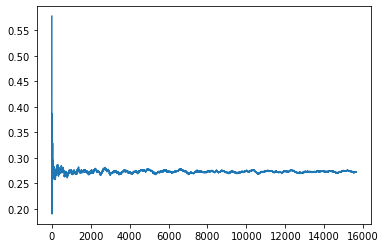

In [185]:
plt.plot(rb.ts);

In [178]:
if False in np.array([0.5, 0.3, 0.2])>0:
    

array([ True,  True,  True])

In [175]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='volatility', budgets=np.array([0.5, 0.3, 0.2]))

# Then we solve the defined problem using X
rb.solve(X, store=True)

In [179]:
rb = RiskBudgeting(risk_measure='VaR', budgets=np.array([0.5, 0.3, 0.2]))

In [180]:
# Then we solve the defined problem using X
rb.solve(X, store=True)

ValueError: The given risk measure is not applicable.

In [176]:
# risk bugdeting portfolio
rb.x

array([0.7124844 , 0.17995448, 0.10756112])

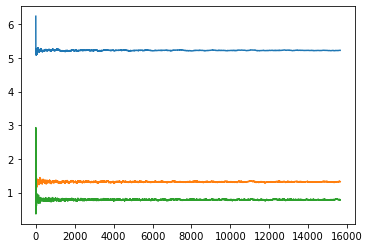

In [177]:
plt.plot(rb.ys);

In [76]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='median_absolute_deviation', budgets='ERC')

# Then we solve the defined problem using X
rb.solve(X, eta_0_y=50, store=True)

In [74]:
# risk bugdeting portfolio
rb.x

array([0.60977844, 0.22122446, 0.1689971 ])

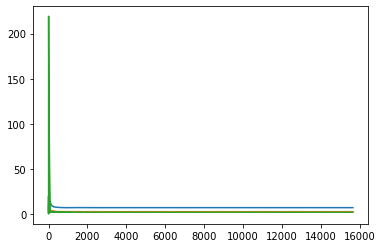

In [75]:
plt.plot(rb.ys);

In [151]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='median_absolute_deviation', budgets='ERC', expectation=True)

# Then we solve the defined problem using X
rb.solve(X, eta_0_y=10, store=True)

In [149]:
# risk bugdeting portfolio
rb.x

array([0.06105165, 0.26609176, 0.67285659])

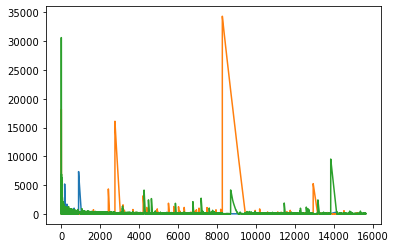

In [150]:
plt.plot(rb.ys);

In [13]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='median_absolute_deviation', budgets='ERC', expectation=True, beta=1, delta=2)

# Then we solve the defined problem using X
rb.solve(X)

In [14]:
rb.x

array([0.50147621, 0.23148739, 0.2670364 ])

In [188]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='expected_shortfall', budgets='ERC', alpha=0.95)

# Then we solve the defined problem using X
rb.solve(X, eta_0_y=.1, store=True)

In [197]:
(2e06*.8 / 128)

12500.0

In [196]:
rb.ys[15624]/rb.ys[15624].sum()

array([0.63384468, 0.20648988, 0.15966544])

In [198]:
rb.ys[12500]/rb.ys[12500].sum()

array([0.63326167, 0.20738774, 0.1593506 ])

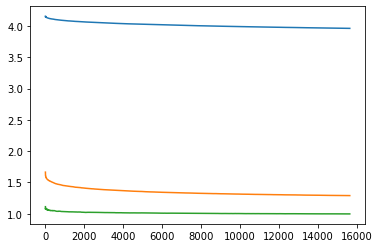

In [190]:
plt.plot(rb.ys);

In [153]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='expected_shortfall', budgets='ERC', alpha=0.95)

# Then we solve the defined problem using X
rb.solve(X, epochs=50, c=.7, store=True)

In [161]:
rb.x

array([0.5856313 , 0.21852923, 0.19583948])

In [115]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='expected_shortfall', budgets='ERC', alpha=0.95, expectation=True, beta=1, delta=2)

# Then we solve the defined problem using X
rb.solve(X, epochs=50, c=.7, store=True)

In [116]:
rb.x

array([0.61305724, 0.22287366, 0.1640691 ])

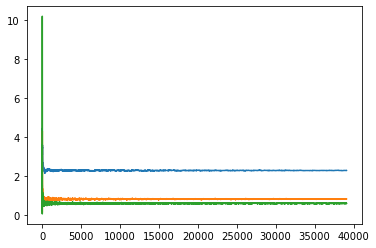

In [117]:
plt.plot(rb.ys)

In [ ]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='expected_shortfall', budgets='ERC', no_expectation=True, alpha=0.95)

# Then we solve the defined problem using X
rb.solve(X)

In [ ]:
rb.x

In [129]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='power_spectral_risk_measure', budgets='ERC', expectation=True, gamma=20)

# Then we solve the defined problem using X
rb.solve(X, epochs=50, c=.7, store=True)

In [130]:
rb.x

array([0.60933888, 0.22252758, 0.16813355])

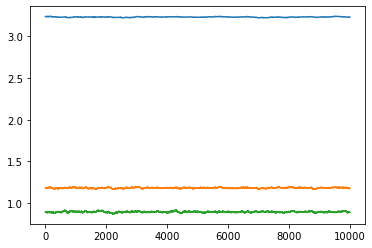

In [131]:
plt.plot(rb.ys[-10000:])

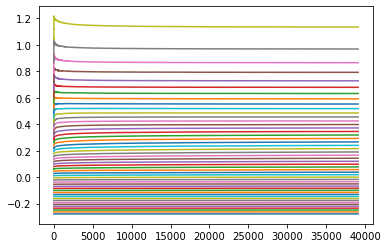

In [132]:
plt.plot(rb.ts);

In [140]:
# First we define our portfolio optimization problem
rb = RiskBudgeting(risk_measure='variantile', budgets='ERC', alpha=.5)

# Then we solve the defined problem using X
rb.solve(X, c=.65, store=True)

In [141]:
rb.x

array([0.60910538, 0.22164219, 0.16925243])

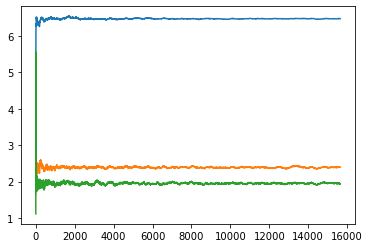

In [139]:
plt.plot(rb.ys)

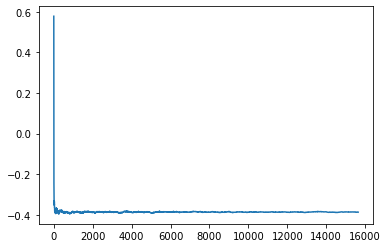

In [136]:
plt.plot(rb.ts)